导入相关的包

In [136]:
import numpy as np
from matplotlib import pyplot as plt

定义计算optimal solution的函数:
$$
-\sum_{i = 1}^{n} \log (\alpha_i + x_i)
$$

In [137]:
def calculate_target(alpha,x):
    return -(np.log2(alpha+x).sum())

定义fill_water函数

首先初始化 $\nu$ 的值为 2.0 (该$\nu$值是我们经过几次实验之后的经验值), $error$ 的值为1.0, 从0开始迭代，并开创 $targets[], errors[]$ 来记录每一次迭代之后的solution以及相应的errors的变化

**Note that:** 我们使用的Gradient Descent算法，其本质上就是General Descent with $\Delta x = -\nabla f(x)$

因此与General Descent算法类似，我们一直迭代直到error的值小于我们期望的precision，因为$\Delta x = -\nabla f(x)$，该$\Delta x$已经具备了方向的意义，并且其大小的变化也在不断优化步长，因此此处error是指 total_water（也即我们设置的1）与在目前 $\nu$ 值对应下的 total_power（也即当前状态下的 $\sum_{i=1}^{n} x$）的差的绝对值，仅用于作为判断迭代结束的条件

而关于迭代的方法：我们选择$step\_size = 0.1$ (对应算法中的t), $\Delta x = -\nabla f(x)$

对应到代码中即是：
* gradient = np.sum(1/(nu**2))    
* nu -= step_size * gradient

刚才我们在用General Descent方式设计$fill\_water$函数的时候，使用了一个$step\_size * error$的优化，实验结果显示使用梯度下降的方法，运行速度真的很慢，因为$\alpha$随机生成的原因，我们还没办法取一个较好的starting point，因此只能选择一个较为经验的2.0，同时我还将$step\_size$从原来的0.01提高到0.1，并将精度也降低到$0.01$,就算在这种状态下，其运行的时间大多数仍然在分钟级别，而优化后的General Descent在1s内即可得到结果，而且效果相当不错，因此刚才下结论说优化后的General Descent算法优于Gradient Descent

为了方便不同时候的需要，我们加入一个判断语句，通过可选的bool参数track, 来决定我们最后的return:
* 如果我们的输出不存在问题，可将track选为false, 以此来简化输出，仅仅输出我们最后的optimmal $x^*$
* 如果我们最后的输出不知为何出了问题，或者说我们想要看到target和error在每一步iterations之后的变化，我们可将track选为true,这样就不仅仅会输出 optimal $x^*$,还会输出数组$target[] 和 error[]$


In [138]:
def fill_water(alpha, total_water, precision, track=False):
    step_size = 0.1
    x = np.zeros_like(alpha)
    nu = 2.0
    error = 1.0
    iteration = 0
    targets = []
    errors = []
    
    while error > precision:
        x = np.maximum(0, 1/nu - alpha)
        total_power = x.sum()
        error = np.abs(total_power - total_water)
        
        if track:
            targets.append(calculate_target(alpha, x))
            errors.append(error)
        
        gradient = np.sum(1/(nu**2))
        nu -= step_size * gradient
        
        iteration += 1
        
    if track:
        return x, targets, errors
    return x

此处我们先规定随机生成的 $\alpha$ 的区间，并规定 $total\_water = 1.0$ 和 $dimension = 10$，换到实际问题中便可以是我们规定总水量为1吨，总共有10个channels，
再给出我们像要达到的精确度，尝试跑了几组数据，由于计算梯度的时间代价太大，倘若此处的精度设得过高，代码会很久都跑不出结果，因此此处设为了$10^{-2}$

然后我们再使用random函数随机生成了10个$\alpha_i$值，并将它们打印出来

In [139]:
alpha_range = [0.0,1.0]
total_water = 1.0
dimension = 10

precision = 0.01

alpha = np.random.uniform(low = alpha_range[0],high = alpha_range[1],size = (dimension,1))
print(alpha)

[[0.69033039]
 [0.96619513]
 [0.91931452]
 [0.55464374]
 [0.78372763]
 [0.06967175]
 [0.56455416]
 [0.426811  ]
 [0.65347449]
 [0.3589314 ]]


然后我们利用定义的$fill\_water$函数求出 optimal $x^*$并将其打印出来，以及将 $\sum_{i=1}^{n} x_i^*$打印出来（可以此比较其与1的差值以见是否达到要求）

同时我们求出水位 $horizontal\_ line$ 其实也即是 $1/\nu^*$,并将其打印出来

In [140]:
x = fill_water(alpha = alpha, total_water=total_water,precision=precision)
print(x)
print(x.sum())

horizontal_line = (alpha+x).min()
print(horizontal_line)

[[0.        ]
 [0.        ]
 [0.        ]
 [0.0401859 ]
 [0.        ]
 [0.5251579 ]
 [0.03027548]
 [0.16801865]
 [0.        ]
 [0.23589825]]
0.9995361774638688
0.5948296449808184


此处定义 $visualize\_ water$函数以对该问题的最终结果进行可视化呈现:

The height of each patch is given by $\alpha_i$. The region is flooded to a level $1/\nu^*$ which uses a total quantity of water equal to one. The height of the water (shown blue) above each patch is the optimal value of $x^*$.

In [141]:
def visualize_water(alpha,x,horizontal_line):
    alpha = alpha.squeeze()
    x = x.squeeze()

    x_range = range(1,x.shape[0]+1)
    plt.xticks(x_range)
    plt.bar(x_range,alpha,color = '#ff9966',width = 1.0,edgecolor = '#ff9966')
    plt.bar(x_range,x,bottom = alpha,color = '#4db8ff',width = 1.0)

    plt.axhline(y = horizontal_line,linewidth =1,color = 'k')
    plt.show()

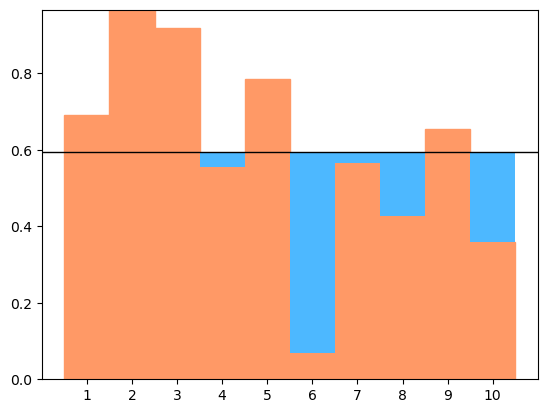

In [142]:
visualize_water(alpha,x,horizontal_line)

此处与$fill\_water$函数中的关于 $track$ 的if 判断语句相对应，可以将最终的 $x^*$ 以及每一次iteration之后的targets和errors输出，便于在代码出现问题之后debug

同时，此处可查看迭代的次数

In [143]:
x,targets,errors = fill_water(alpha = alpha,total_water=total_water,precision=precision,track = True)
print(x)
print(targets)
print(errors)

print('iteration:',len(errors))

[[0.        ]
 [0.        ]
 [0.        ]
 [0.0401859 ]
 [0.        ]
 [0.5251579 ]
 [0.03027548]
 [0.16801865]
 [0.        ]
 [0.23589825]]
[np.float64(6.346179896494576), np.float64(6.291737856363798), np.float64(6.235188380225907), np.float64(6.176362882186631), np.float64(6.1150718029824205), np.float64(6.051100993840134), np.float64(5.984207288403509), np.float64(5.914113034299307), np.float64(5.821572371760101), np.float64(5.699025912954863), np.float64(5.5626591193438975), np.float64(5.418254829800916)]
[np.float64(0.35541414241001323), np.float64(0.33642680063786157), np.float64(0.3164499410204822), np.float64(0.29539019871248084), np.float64(0.27314115018467633), np.float64(0.24958084342689002), np.float64(0.22456872879558665), np.float64(0.1979418100338176), np.float64(0.16218538529697635), np.float64(0.11400301630199483), np.float64(0.05941037489860668), np.float64(0.0004638225361311976)]
iteration: 12


此处定义 $visualize\_targets\_and\_errors$函数，对在迭代过程中的targets和errors的变化进行可视化呈现，以观察实验效果

In [144]:
def visualize_targets_and_errors(targets,errors):
    x = range(len(targets))
    plt.plot(x,targets,label = 'targets')
    plt.plot(x,errors,label = 'errors')

    plt.legend(loc = 'best')

    plt.show()

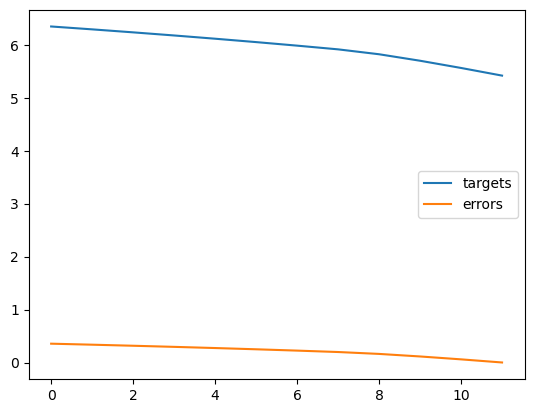

In [145]:
visualize_targets_and_errors(targets,errors)

⼀顿操作之后，我们很自然地想确认自己的结果是不是正确的，但对于该问题，由于$\alpha$生成的随机性，“标准答案”并不好寻找，我们就可以通过判断我们的实现的算法是否⽐随机⽣成的解要好，以此来判断我们的解的正确性

此处我们定义了一个 $monkey_search$函数以生成随机解，并将其可视化呈现。其中橙线是我们得到的optimal solution of $-\sum_{i = 1}^{n} \log (\alpha_i + x_i)$,蓝点即是每一只“猴子”确定的随机解

In [146]:
def monkey_search(alpha):
    while True:
        monkey_solutions = np.random.dirichlet(np.ones(10),size = 1).reshape(-1,1)
        if np.less(monkey_solutions,0).any():
            continue
        return monkey_solutions
    
def visualize_monkey_search(alpha,monkey_amount,optimal):
    monkey_solutions = [calculate_target(alpha,monkey_search(alpha))\
                        for _ in range(monkey_amount)]
    plt.scatter(range(monkey_amount),monkey_solutions)
    plt.axhline(y = optimal,linewidth = 1,color = 'r')

    plt.show()

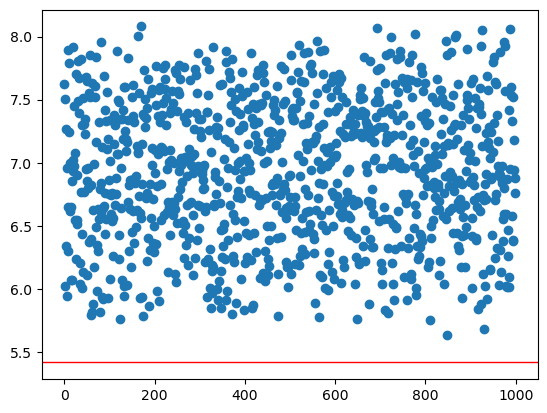

In [147]:
optimal_line= targets[len(targets)-1]
visualize_monkey_search(alpha,1000,optimal_line)